In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
!pip install arch
from arch.unitroot import PhillipsPerron

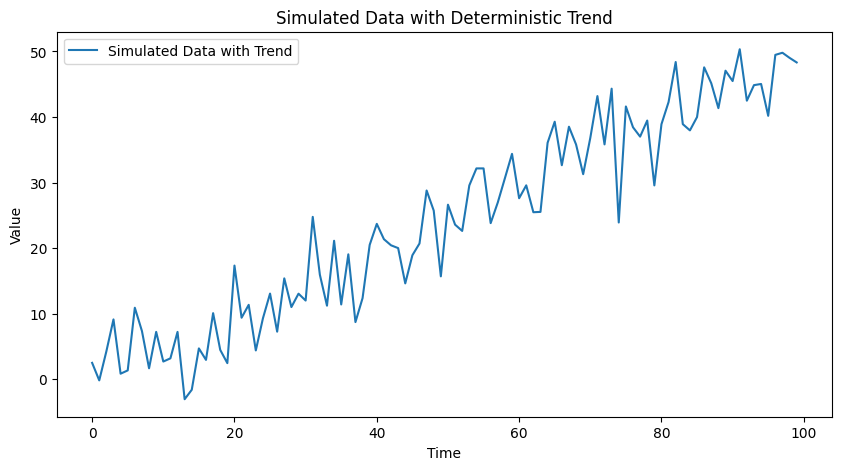

Phillips-Perron Test:
Test Statistic: -1.6134276146033877
p-value: 0.4761765850824119
Critical Values: {'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}
Conclusion: Fail to reject H0 (Series has unit root)

KPSS Test:
Test Statistic: 0.08053971229558081
p-value: 0.1
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Conclusion: Fail to reject H0 (Series is trend-stationary)


/tmp/ipython-input-6-980196584.py:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(series, regression='ct')  # 'ct' for trend stationarity


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron # Import PhillipsPerron from arch.unitroot

# Simulate data with deterministic trend
np.random.seed(42)
n = 100  # Number of observations
time = np.arange(n)
trend = 0.5 * time  # Linear deterministic trend
noise = np.random.normal(0, 5, n)  # Random noise
y = trend + noise  # Simulated series with trend

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time, y, label='Simulated Data with Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simulated Data with Deterministic Trend')
plt.legend()
plt.show()

# Phillips-Perron (PP) Test
def pp_test(series):
    pp_result = PhillipsPerron(series)
    print("Phillips-Perron Test:")
    print(f"Test Statistic: {pp_result.stat}")
    print(f"p-value: {pp_result.pvalue}")
    print(f"Critical Values: {pp_result.critical_values}")
    if pp_result.pvalue < 0.05:
        print("Conclusion: Reject H0 (Series is stationary)")
    else:
        print("Conclusion: Fail to reject H0 (Series has unit root)")

# KPSS Test
def kpss_test(series):
    kpss_stat, p_value, lags, crit_values = kpss(series, regression='ct')  # 'ct' for trend stationarity
    print("\nKPSS Test:")
    print(f"Test Statistic: {kpss_stat}")
    print(f"p-value: {p_value}")
    print(f"Critical Values: {crit_values}")
    if p_value < 0.05:
        print("Conclusion: Reject H0 (Series is Difference stationary)")
    else:
        print("Conclusion: Fail to reject H0 (Series is trend-stationary)")

# Run tests
print("="*50)
pp_test(y)
print("="*50)
kpss_test(y)